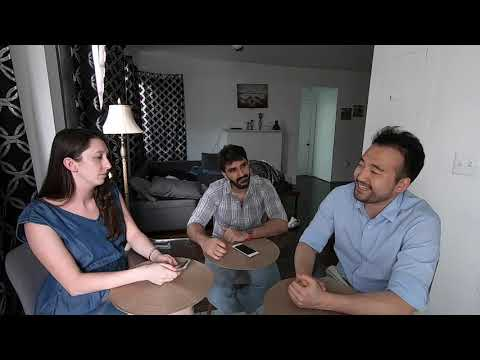

In [22]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'XtA6FQz8BHQ'

YouTubeVideo(YOUTUBE_ID)

In [23]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID


[youtube] XtA6FQz8BHQ: Downloading webpage
[youtube] XtA6FQz8BHQ: Downloading MPD manifest
[download] Destination: youtube.mp4
[download] 100% of 21.00MiB in 07:5400KiB/s ETA 00:00
/bin/bash: ffmpeg: command not found


In [24]:
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [8]:
!OpenFace/build/bin/FaceLandmarkVidMulti -f OpenFace/samples/multi_face.avi

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: OpenFace/build/bin/model/model_eye/main_c

In [9]:
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed/video.avi output.mp4

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: OpenFace/build/bin/model/model_eye/main_c

In [1]:
# To visualize result
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import numpy
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#sns.set_style('white')

# Load data
df = pd.read_csv('processed/video.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head(10)

Max number of frames 300 
Total shape of dataframe (925, 714)


frame  face_id  timestamp  confidence  success  gaze_0_x  gaze_0_y  \
0      1        0      0.000        0.98        1 -0.371187  0.453648   
1      1        1      0.000        0.88        1  0.173799  0.265314   
2      1        2      0.000        0.03        0  0.000000  0.000000   
3      2        0      0.033        0.98        1 -0.372143  0.465458   
4      2        1      0.033        0.88        1  0.182885  0.310032   
5      2        2      0.033        0.03        0  0.000000  0.000000   
6      3        0      0.067        0.98        1 -0.389655  0.460996   
7      3        1      0.067        0.88        1  0.187220  0.320017   
8      3        2      0.067        0.03        0  0.000000  0.000000   
9      4        0      0.100        0.98        1 -0.441702  0.440856   

   gaze_0_z  gaze_1_x  gaze_1_y  ...  AU12_c  AU14_c  AU15_c  AU17_c  AU20_c  \
0 -0.810200 -0.605847  0.412054  ...     0.0     1.0     0.0     1.0     1.0   
1 -0.948368  0.026450  0.275588  ...     0.0     1.0     1.0     1.0     1.0   
2  0.000000  0.000000  0.000000  ...     1.0     0.0     1.0     0.0     1.0   
3 -0.803031 -0.601953  0.418891  ...     0.0     1.0     0.0     1.0     1.0   
4 -0.932970  0.032857  0.324268  ...     0.0     1.0     1.0     1.0     1.0   
5  0.000000  0.000000  0.000000  ...     1.0     0.0     1.0     0.0     1.0   
6 -0.797278 -0.629902  0.421254  ...     0.0     1.0     0.0     1.0     1.0   
7 -0.928729  0.043032  0.334173  ...     0.0     1.0     1.0     1.0     1.0   
8  0.000000  0.000000  0.000000  ...     0.0     1.0     1.0     0.0     1.0   
9 -0.781374 -0.655544  0.415276  ...     0.0     1.0     0.0     1.0     1.0   

   AU23_c  AU25_c  AU26_c  AU28_c  AU45_c  
0     0.0     0.0     0.0     0.0     1.0  
1     0.0     1.0     0.0     0.0     1.0  
2     1.0     0.0     0.0     1.0     0.0  
3     0.0     0.0     0.0     0.0     1.0  
4     0.0     1.0     0.0     0.0     1.0  
5     1.0     0.0     0.0     1.0     0.0  
6     0.0     0.0     0.0     0.0     1.0  
7     0.0     1.0     0.0     0.0     1.0  
8     1.0     0.0     0.0     1.0     0.0  
9     0.0     0.0     0.0     0.0     1.0  

[10 rows x 714 columns]

In [10]:
# see label definitions at https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format/79e79cc5405d35b268e89f0564fe084ab972dc36

numpy.set_printoptions(threshold=sys.maxsize)
print((df.columns).tolist())

['frame', 'face_id', 'timestamp', 'confidence', 'success', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z', 'gaze_1_x', 'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y', 'eye_lmk_x_0', 'eye_lmk_x_1', 'eye_lmk_x_2', 'eye_lmk_x_3', 'eye_lmk_x_4', 'eye_lmk_x_5', 'eye_lmk_x_6', 'eye_lmk_x_7', 'eye_lmk_x_8', 'eye_lmk_x_9', 'eye_lmk_x_10', 'eye_lmk_x_11', 'eye_lmk_x_12', 'eye_lmk_x_13', 'eye_lmk_x_14', 'eye_lmk_x_15', 'eye_lmk_x_16', 'eye_lmk_x_17', 'eye_lmk_x_18', 'eye_lmk_x_19', 'eye_lmk_x_20', 'eye_lmk_x_21', 'eye_lmk_x_22', 'eye_lmk_x_23', 'eye_lmk_x_24', 'eye_lmk_x_25', 'eye_lmk_x_26', 'eye_lmk_x_27', 'eye_lmk_x_28', 'eye_lmk_x_29', 'eye_lmk_x_30', 'eye_lmk_x_31', 'eye_lmk_x_32', 'eye_lmk_x_33', 'eye_lmk_x_34', 'eye_lmk_x_35', 'eye_lmk_x_36', 'eye_lmk_x_37', 'eye_lmk_x_38', 'eye_lmk_x_39', 'eye_lmk_x_40', 'eye_lmk_x_41', 'eye_lmk_x_42', 'eye_lmk_x_43', 'eye_lmk_x_44', 'eye_lmk_x_45', 'eye_lmk_x_46', 'eye_lmk_x_47', 'eye_lmk_x_48', 'eye_lmk_x_49', 'eye_lmk_x_50', 'eye_lmk_x_51', 'eye_lmk_x_52',